<a href="https://colab.research.google.com/github/VEMULAVISHNUVARDHAN4076/Natural-Language-Processing/blob/main/2403A54076_NLP_LAB_Assignment_10_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 25.0 MB/s eta 0:00:00


In [2]:
# ================================
# Loading Pre-trained Embeddings
# ================================
from gensim.models import KeyedVectors
import gensim.downloader as api

# ================================
# Handling Matrices & Numerical Operations
# ================================
import numpy as np

# ================================
# Visualization
# ================================
import matplotlib.pyplot as plt

# ================================
# t-SNE for Dimensionality Reduction
# ================================
from sklearn.manifold import TSNE

In [3]:
# Load pre-trained Word2Vec model (may take time on first download)
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


In [5]:
# Selected word groups: Animals, Cities, Technology, Fruits, Countries
word_list = [
    # Animals
    "dog", "cat", "lion", "tiger", "elephant", "wolf", "monkey",

    # Fruits
    "apple", "banana", "mango", "orange", "grape", "pineapple",

    # Cities
    "paris", "london", "delhi", "tokyo", "newyork", "mumbai",

    # Technology
    "computer", "laptop", "keyboard", "internet", "software", "hardware",

    # Countries
    "india", "china", "japan", "france", "germany", "brazil",

    # Vehicles
    "car", "bus", "train", "bicycle", "airplane",

    # Education
    "school", "college", "teacher", "student"
]

In [6]:
vectors = [model_word2vec[word] for word in word_list if word in model_word2vec]

# Convert to NumPy array
vectors_word2vec = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_word2vec.shape)
print(vectors_word2vec[0])

Total selected words: 40
Vector shape: (40, 300)
[ 5.12695312e-02 -2.23388672e-02 -1.72851562e-01  1.61132812e-01
 -8.44726562e-02  5.73730469e-02  5.85937500e-02 -8.25195312e-02
 -1.53808594e-02 -6.34765625e-02  1.79687500e-01 -4.23828125e-01
 -2.25830078e-02 -1.66015625e-01 -2.51464844e-02  1.07421875e-01
 -1.99218750e-01  1.59179688e-01 -1.87500000e-01 -1.20117188e-01
  1.55273438e-01 -9.91210938e-02  1.42578125e-01 -1.64062500e-01
 -8.93554688e-02  2.00195312e-01 -1.49414062e-01  3.20312500e-01
  3.28125000e-01  2.44140625e-02 -9.71679688e-02 -8.20312500e-02
 -3.63769531e-02 -8.59375000e-02 -9.86328125e-02  7.78198242e-03
 -1.34277344e-02  5.27343750e-02  1.48437500e-01  3.33984375e-01
  1.66015625e-02 -2.12890625e-01 -1.50756836e-02  5.24902344e-02
 -1.07421875e-01 -8.88671875e-02  2.49023438e-01 -7.03125000e-02
 -1.59912109e-02  7.56835938e-02 -7.03125000e-02  1.19140625e-01
  2.29492188e-01  1.41601562e-02  1.15234375e-01  7.50732422e-03
  2.75390625e-01 -2.44140625e-01  2.96875

In [7]:
vectors = [model_glove[word] for word in word_list if word in model_glove]

# Convert to NumPy array
vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_glove.shape)
print(vectors_glove[0])

Total selected words: 40
Vector shape: (40, 100)
[ 0.30817    0.30938    0.52803   -0.92543   -0.73671    0.63475
  0.44197    0.10262   -0.09142   -0.56607   -0.5327     0.2013
  0.7704    -0.13983    0.13727    1.1128     0.89301   -0.17869
 -0.0019722  0.57289    0.59479    0.50428   -0.28991   -1.3491
  0.42756    1.2748    -1.1613    -0.41084    0.042804   0.54866
  0.18897    0.3759     0.58035    0.66975    0.81156    0.93864
 -0.51005   -0.070079   0.82819   -0.35346    0.21086   -0.24412
 -0.16554   -0.78358   -0.48482    0.38968   -0.86356   -0.016391
  0.31984   -0.49246   -0.069363   0.018869  -0.098286   1.3126
 -0.12116   -1.2399    -0.091429   0.35294    0.64645    0.089642
  0.70294    1.1244     0.38639    0.52084    0.98787    0.79952
 -0.34625    0.14095    0.80167    0.20987   -0.86007   -0.15308
  0.074523   0.40816    0.019208   0.51587   -0.34428   -0.24525
 -0.77984    0.27425    0.22418    0.20164    0.017431  -0.014697
 -1.0235    -0.39695   -0.0056188  0.3056

In [9]:
# Assume vectors already extracted from previous step
# vectors shape example: (40, 100)

# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_word2vec)

# Store results
print("Original Shape:", vectors_word2vec.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of word2vec
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_word2vec[:5])

Original Shape: (40, 300)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 89.20585   26.330187]
 [ 99.12784   48.312725]
 [133.58298   75.642136]
 [173.41393   68.46614 ]
 [169.56253   40.366295]]

First 5 t-SNE Coordinates:
[[ 0.05126953 -0.02233887 -0.17285156 ...  0.41601562 -0.35546875
   0.22265625]
 [ 0.0123291   0.20410156 -0.28515625 ...  0.4921875  -0.27539062
   0.05615234]
 [ 0.21289062 -0.00457764 -0.23632812 ... -0.13867188 -0.19921875
   0.17675781]
 [-0.06835938  0.18261719 -0.17773438 ...  0.19042969 -0.10205078
   0.17285156]
 [ 0.02001953  0.31445312 -0.27734375 ...  0.33007812 -0.37109375
   0.20605469]]


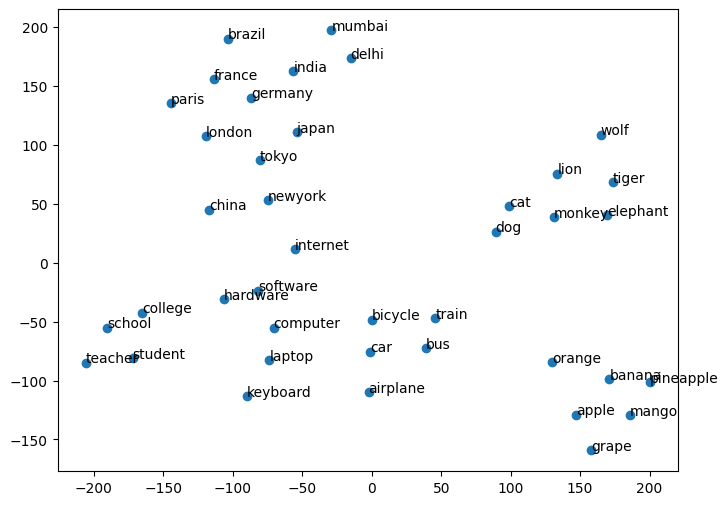

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()

In [11]:
# Assume vectors already extracted from previous step
# vectors shape example: (40, 100)

# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_glove)

# Store results
print("Original Shape:", vectors_glove.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of glove
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_glove[:5])

Original Shape: (40, 100)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 89.72272  -58.00955 ]
 [113.240166 -50.66101 ]
 [144.24384  -17.128843]
 [178.48518  -35.047974]
 [148.68843  -48.30675 ]]

First 5 t-SNE Coordinates:
[[ 3.0817e-01  3.0938e-01  5.2803e-01 -9.2543e-01 -7.3671e-01  6.3475e-01
   4.4197e-01  1.0262e-01 -9.1420e-02 -5.6607e-01 -5.3270e-01  2.0130e-01
   7.7040e-01 -1.3983e-01  1.3727e-01  1.1128e+00  8.9301e-01 -1.7869e-01
  -1.9722e-03  5.7289e-01  5.9479e-01  5.0428e-01 -2.8991e-01 -1.3491e+00
   4.2756e-01  1.2748e+00 -1.1613e+00 -4.1084e-01  4.2804e-02  5.4866e-01
   1.8897e-01  3.7590e-01  5.8035e-01  6.6975e-01  8.1156e-01  9.3864e-01
  -5.1005e-01 -7.0079e-02  8.2819e-01 -3.5346e-01  2.1086e-01 -2.4412e-01
  -1.6554e-01 -7.8358e-01 -4.8482e-01  3.8968e-01 -8.6356e-01 -1.6391e-02
   3.1984e-01 -4.9246e-01 -6.9363e-02  1.8869e-02 -9.8286e-02  1.3126e+00
  -1.2116e-01 -1.2399e+00 -9.1429e-02  3.5294e-01  6.4645e-01  8.9642e-02
   7.0294e-01  1.1244e+00  3.

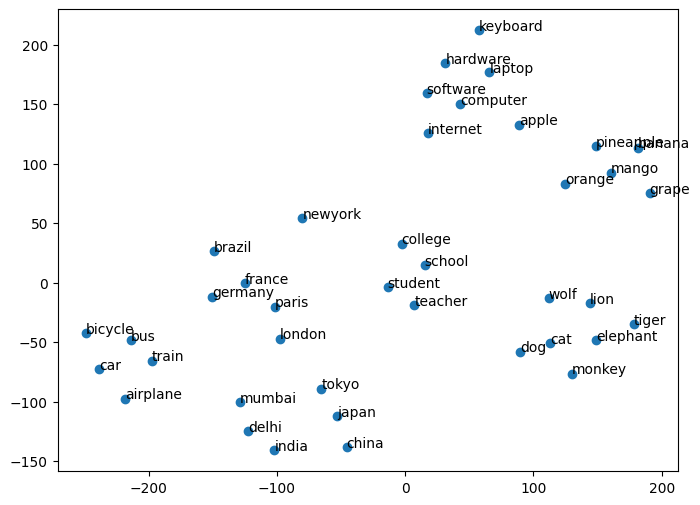

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()